# 4.4 連続型確率分布

In [3]:
using Distributions
using PyPlot

In [2]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.4.4 ガンマ分布

In [4]:
# パラメータ
α = 1.5
θ = 2.5
d = Gamma(α, θ)

Gamma{Float64}(α=1.5, θ=2.5)

In [5]:
# サンプリング
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 14.005  0.435672  7.81196  0.626226  …  14.6825  1.36363  5.31617  4.87462

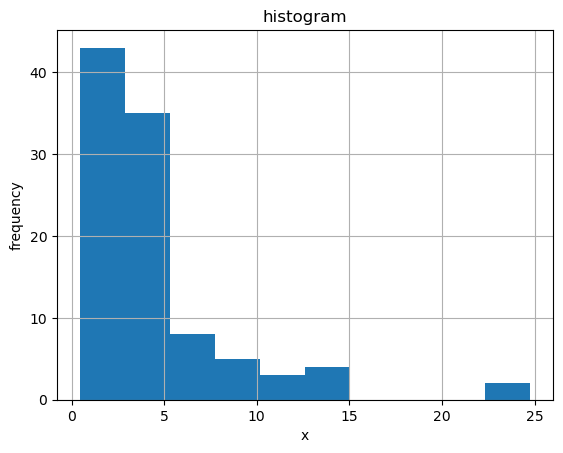

In [6]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram")

In [7]:
println("mean(exact) = $(mean(d)), $(α*θ), mean(approx) = $(mean(X))")

mean(exact) = 3.75, 3.75, mean(approx) = 4.3678115504164445


In [9]:
println("var(exact) = $(var(d)), $(α*θ^2), var(approx) = $(var(X))")

var(exact) = 9.375, 9.375, var(approx) = 17.471387399940696


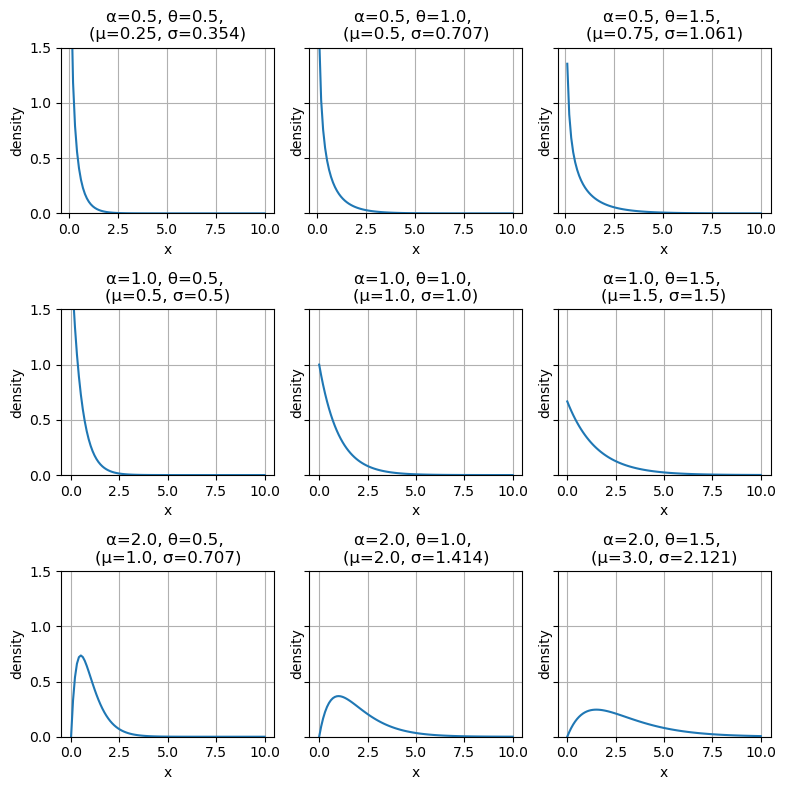

In [15]:
xs = range(0, 10, length=100)
αs = [0.5, 1.0, 2.0]
θs = [0.5, 1.0, 1.5]
fig, axes = subplots(length(αs), length(θs), sharey=true, figsize=(8,8))

for (i, α) in enumerate(αs)
    for (j, θ) in enumerate(θs)
        d = Gamma(α, θ)
        μ, σ = mean(d), std(d)
        axes[i,j].plot(xs, pdf.(d, xs))
        axes[i,j].set_ylim([0, 1.5])
        set_options(axes[i,j], "x", "density",
                    "α=$(α), θ=$(θ), \n" *
                    "(μ=$(round(μ, digits=3)), σ=$(round(σ, digits=3)))")
    end
end
tight_layout()